In [1]:
!pip install pyspark

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting pyspark',
 '  Downloading pyspark-3.4.0.tar.gz (310.8 MB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/310.8 MB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.2/310.8 MB\x1b \x1b6.1 MB/s\x1b eta \x1b0:00:51\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b1.5/310.8 MB\x1b \x1b21.6 MB/s\x1b eta \x1b0:00:15\x1b',
 '\x1b[2K     \x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b6.1/310.8 MB\x1b \x1b56.0 MB/s\x1b eta \x1b0:00:06\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b9.0/310.8 MB\x1b \x1b62.2 MB/s\x1b eta \x1b0:00:05\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╺\x1b\x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b11.5/310.8 MB\x1b \x1b96.4 MB/s\x1b eta \x1b0:00:04\x1b',
 '\x1b[2K     \x1b━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━

In [4]:
import pyspark

# First things first:
* Spark is a big data framework used for data analysis, machine learning, graph analysis and streaming of live data. 
* Other similar architecture(s): Hadoop. 
* Spark differrs from Hadoop in the following ways:
  1. Spark uses RDDs, Hadoop uses HDFS. 
  2. Spark is much faster than Hadoop because of number 1. Above. 
  3. Spark does not necessarily incorporate MapReduce. 

* Spark limitations:
    1. Has a fairly long latency period of approx. 500ms
    2. Does not natively support deep learning algos or ML algos that do not scale linearly with data


## Spark 101. 
* Spark works with "apps" contained in spark contexts. 

In [5]:
sc = pyspark.SparkContext(appName="sparkIntro")

* In Spark, we transform data using maps. 
* Maps consume data as input and use a function to transform the data. 
* Here, we experiment with a function that converts all text to lower case

In [6]:
songs_log = ['Tano tena', "Wajinga sisi", "Stella", "Safari ya Bamba", "Kimewaramba"]
#parralelize the songs
distributed_songs_log = sc.parallelize(songs_log)

In [7]:
#creating our function to be used in mapping
def lowercased_log(songs):
  return songs.lower()


In [10]:
%time
#the map will iterate through each song in our log and convert it to lower case
distributed_songs_log.map(lowercased_log)


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.5 µs


PythonRDD[1] at RDD at PythonRDD.scala:53

In [11]:
distributed_songs_log.map(lowercased_log).collect()

['tano tena', 'wajinga sisi', 'stella', 'safari ya bamba', 'kimewaramba']

* Point to note: the collect function is an action that returns the actual output of the map. Read more on [actions](https://sparkbyexamples.com/spark/spark-rdd-actions/). 
* The original dataset is not being changed by out actions. 


# Data Reading and Writing

### Prerequisites for our new session

In [12]:
from pyspark import SparkConf 
from pyspark.sql import SparkSession 

### Initializing the application configurations

In [13]:
spark = SparkSession.builder.appName("sparkIntro").getOrCreate()

### High-level config details

In [14]:
spark.sparkContext.getConf().getAll()

[('spark.app.id', 'local-1685162551837'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', '5d87562b1a74'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.submitTime', '16851625497

### Config Summary

In [16]:
spark

In [17]:
!unzip /content/sparkify_log_small.json.zip

Archive:  /content/sparkify_log_small.json.zip
  inflating: sparkify_log_small.json  


#### Reading log files for music app

In [18]:
sample_logs = spark.read.json("/content/sparkify_log_small.json")

#### Accesssing log attributes

* Print Schema returns all column names and their corresponding properties(data types and weather they can accept null values)

In [19]:
sample_logs.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



* Describe() is a fancier version of printSchema minus the nullable parameter

In [20]:
sample_logs.describe()

DataFrame[summary: string, artist: string, auth: string, firstName: string, gender: string, itemInSession: string, lastName: string, length: string, level: string, location: string, method: string, page: string, registration: string, sessionId: string, song: string, status: string, ts: string, userAgent: string, userId: string]

* .show(n) method returns the top n values. Here, n=1 returns the first row, n=5 returns the first five etc

In [21]:
sample_logs.show(n=1)

+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       artist|     auth|firstName|gender|itemInSession|lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|Showaddywaddy|Logged In|  Kenneth|     M|          112|Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
+-------------+---------+---------+------+-------------+--------+---------+-----+--------------------+------+--------+-------------+---------+------

In [23]:
sample_logs.show(n=10)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

* .take(n) argument extracts the first n values from our spark data. 

In [25]:
sample_logs.take(5)

[Row(artist='Showaddywaddy', auth='Logged In', firstName='Kenneth', gender='M', itemInSession=112, lastName='Matthews', length=232.93342, level='paid', location='Charlotte-Concord-Gastonia, NC-SC', method='PUT', page='NextSong', registration=1509380319284, sessionId=5132, song='Christmas Tears Will Fall', status=200, ts=1513720872284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.125 Safari/537.36"', userId='1046'),
 Row(artist='Lily Allen', auth='Logged In', firstName='Elizabeth', gender='F', itemInSession=7, lastName='Chase', length=195.23873, level='free', location='Shreveport-Bossier City, LA', method='PUT', page='NextSong', registration=1512718541284, sessionId=5027, song='Cheryl Tweedy', status=200, ts=1513720878284, userAgent='"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.143 Safari/537.36"', userId='1000'),
 Row(artist='Cobra Starship Featuring Leighton Meester', auth='Logged In', firstNa

* Data can be written to an output file in any given format as follows

In [26]:
sample_logs.write.save("sample_output.csv", format="csv", header=True)

* The data can be re-read as:

In [28]:
new_logs = spark.read.csv("/content/sample_output.csv", header=True)
new_logs.show()

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shreveport-Bossie...|   PUT

In [29]:
#We can choose to see the output of only one column
new_logs.select("Artist").show(5)

+--------------------+
|              Artist|
+--------------------+
|       Showaddywaddy|
|          Lily Allen|
|Cobra Starship Fe...|
|          Alex Smoke|
|                null|
+--------------------+
only showing top 5 rows



# Exploratory Data Analysis with PySpark

In [30]:
from pyspark.sql import SparkSession 
from pyspark.sql.functions import udf 
from pyspark.sql.types import StringType, IntegerType 
from pyspark.sql.functions import desc, asc 
from pyspark.sql.functions import sum as Fsum 

import datetime 
import numpy as np 
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

* We will continue working with the sample_logs data

In [31]:
#Getting total number of records:
print("Total number of records are " + str(sample_logs.count()))

Total number of records are 10000


* We can get a subset of the data and sort through it as: 
* Note that since we are working with a text-based column here, the sorting is alphabetic

In [32]:
sample_logs.select("page").dropDuplicates().sort("page").show(5)

+---------+
|     page|
+---------+
|    About|
|Downgrade|
|    Error|
|     Help|
|     Home|
+---------+
only showing top 5 rows



* In the example that follows, we create a subset dataframe from a specific user using the where commmand.
* We use the collect() action to store it to memory

In [33]:
sample_logs.select(["userId", "firstname", "page", "song"]).where(
    sample_logs.userId == "1046"
).collect()

[Row(userId='1046', firstname='Kenneth', page='NextSong', song='Christmas Tears Will Fall'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Be Wary Of A Woman'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Public Enemy No.1'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Reign Of The Tyrants'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Father And Son'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='No. 5'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Seventeen'),
 Row(userId='1046', firstname='Kenneth', page='Home', song=None),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='War on war'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Killermont Street'),
 Row(userId='1046', firstname='Kenneth', page='NextSong', song='Black & Blue'),
 Row(userId='1046', firstname='Kenneth', page='Logout', song=None),
 Row(userId='1046', firstname='Kenneth'

#### Getting hourly statistics for the user selected

In [34]:
get_hour = udf(lambda x: datetime.datetime.fromtimestamp(x/1000.0).hour)

In [36]:
sample_log = sample_logs.withColumn("hour", get_hour(sample_logs.ts))
sample_log.show(4)

+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|              artist|     auth|firstName|gender|itemInSession| lastName|   length|level|            location|method|    page| registration|sessionId|                song|status|           ts|           userAgent|userId|hour|
+--------------------+---------+---------+------+-------------+---------+---------+-----+--------------------+------+--------+-------------+---------+--------------------+------+-------------+--------------------+------+----+
|       Showaddywaddy|Logged In|  Kenneth|     M|          112| Matthews|232.93342| paid|Charlotte-Concord...|   PUT|NextSong|1509380319284|     5132|Christmas Tears W...|   200|1513720872284|"Mozilla/5.0 (Win...|  1046|  22|
|          Lily Allen|Logged In|Elizabeth|     F|            7|    Chase|195.23873| free|Shrevep

* How many songs does user view/listen to per hour?


In [37]:
songs_per_hour = sample_log.filter(sample_log.page=="NextSong").groupby(sample_log.hour).count().orderBy(sample_log.hour.cast("float"))
songs_per_hour.show(5)

+----+-----+
|hour|count|
+----+-----+
|   0|  456|
|   1|  454|
|   2|  382|
|   3|  302|
|   4|  352|
+----+-----+
only showing top 5 rows



* Pyspark can be intergrated with Pandas for easy visualization using Python tools like matplotlib, seaborn, etc

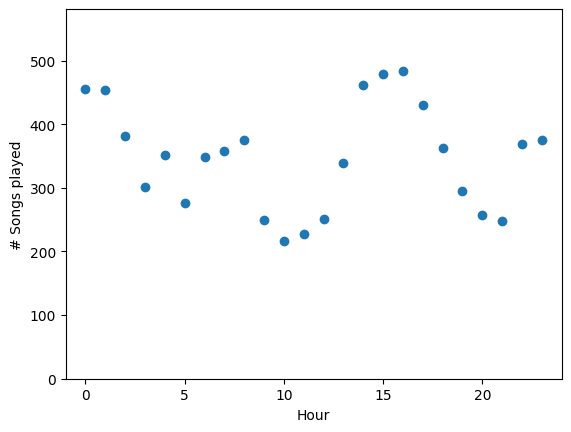

In [38]:
songs_per_hour_df = songs_per_hour.toPandas()
songs_per_hour_df.hour = pd.to_numeric(songs_per_hour_df.hour)
#visualization using scatter plot
plt.scatter(songs_per_hour_df['hour'], songs_per_hour_df['count'])
plt.xlim(-1, 24)
plt.ylim(0, 1.2*max(songs_per_hour_df['count']))
plt.xlabel("Hour")
plt.ylabel("# Songs played");

## End of Introduction to data analysis with PySpark. 
## We start from here in next sssion. 